<a href="https://colab.research.google.com/github/riasingh1181/Mini-project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                           **YOUTUBE TRENDING VIDEOS OF INDIA ANALYSIS**


#                                              Introduction

 ->      YouTube is the most popular and most used video platfrom in the world today. 
 
 ->      YouTube has a list of trending videos that is updated constantly. Here we will use Python with some packages like Pandas and Matplotlib to analyze a dataset that was collected.
 
 ->     The dataset contains data about the trending videos of the days, months, years. It contains data about more than 35,000 trending videos. We will analyze this data to get insights into YouTube trending videos, to see what is common between these videos.
 
 ->     Those insights might also be used by people who want to increase popularity of their videos on YouTube.


->      The dataset that we will use is obtained from Kaggle here. 

->      It contains data about trending videos of India. Here we will analyze India's trending videos.



#Goals of the analysis#

###We want to answer questions like:
->   Importing our dataset .

->   Create category column.

->   Title length of videos. 

->   How many views do our trending videos have? (In graph form)

->   Number and Percentage of Liked videos , Disliked videos, Viewed videos, Commented Videos. 

->   Relation of likes and views in videos.

->   Trending videos by time ( Publishind day, Publishing hour )

->   Wordclouds by tags .

->  Wordclouds by titles .

->   Trending videos by category and in the form of graph .

->  Trending videos by Like, Dislikes and Category.


->   Top 10 Trending videos
 1.  Liked videos 
 2.  Disliked videos 
 3.  Viewed videos 
 4.  Comment_count. 

->  Trending channels in India.

->  Top 10 trending channels with trending videos.  

Let's get started.

##

#                                              Importing some packages


   First, we import some Python packages that will help us analyzing the data, especially pandas for data analysis and matplotlib for visualization.

In [ ]:

#import libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# authenticate user
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import json
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# to use file uploaded on drive
downloaded = drive.CreateFile({'id':'1_zO8iqHJJV-6_-SUP7fQJGegVfWYUbLC'})  # use the uploaded file id
downloaded.GetContentFile('INvideos.csv')  
df = pd.read_csv('INvideos.csv')

In [ ]:
# to use file uploaded on drive
downloaded = drive.CreateFile({'id':'1cWNdyE8jiZWudflmUmMcFfV849oHBH6b'})  # use the uploaded file id
downloaded.GetContentFile('IN_category_id.json')  
dff = pd.read_json('IN_category_id.json')

# Dataset

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Category column is created.

In [ ]:
                                                #Use only once (Fails after 1st Attempt)#
# We'll use a very nice python feature - dictionary comprehension, to extract most important data from IN_category_id.json
categories = {category['id']: category['snippet']['title'] for category in dff['items']}

# Now we will create new column that will represent name of category
df.insert(4, 'category', df['category_id'].astype(str).map(categories))
df.tail(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,Entertainment,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,Entertainment,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...
37351,wERgpPK44w0,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,Entertainment,24,2018-06-10T04:29:54.000Z,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


# Title length of videos are shown in the form of graph.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


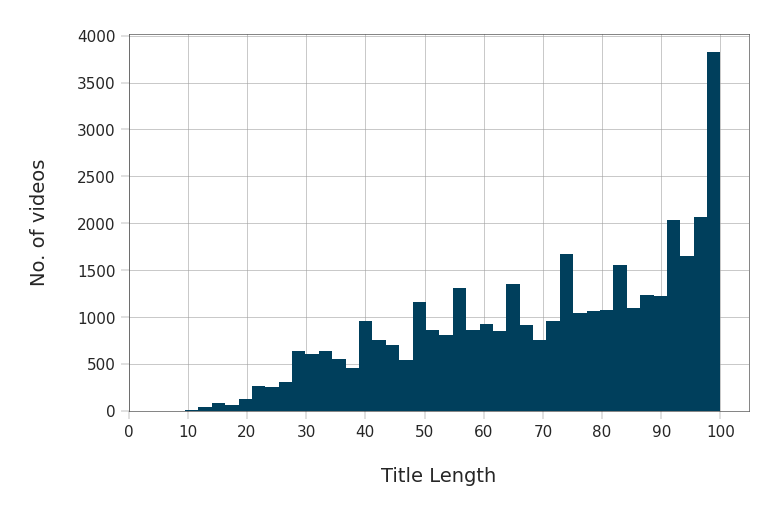

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df['title_length'], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

# No. of views on videos in form of graph.

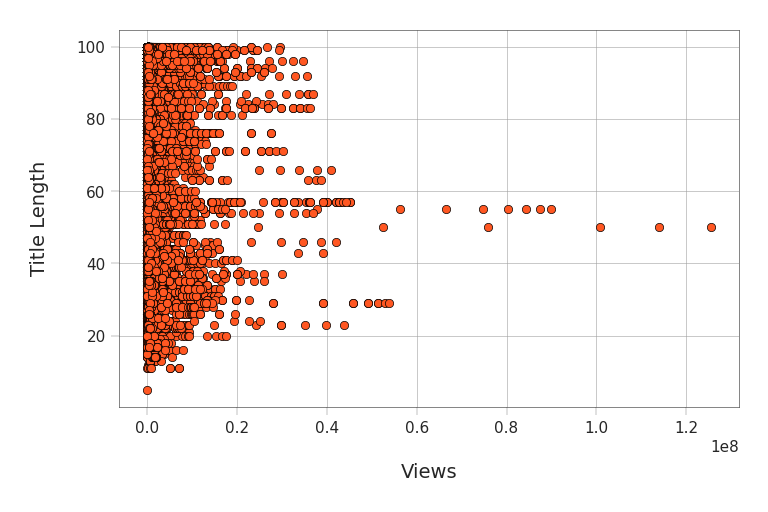

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")               

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


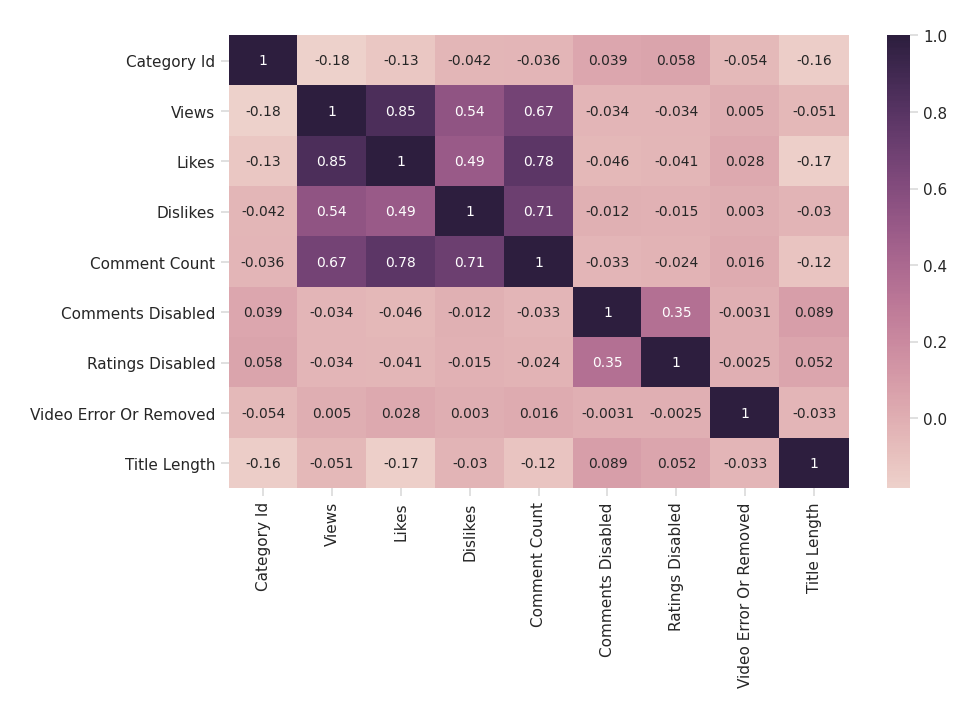

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

# Likes and Views relation

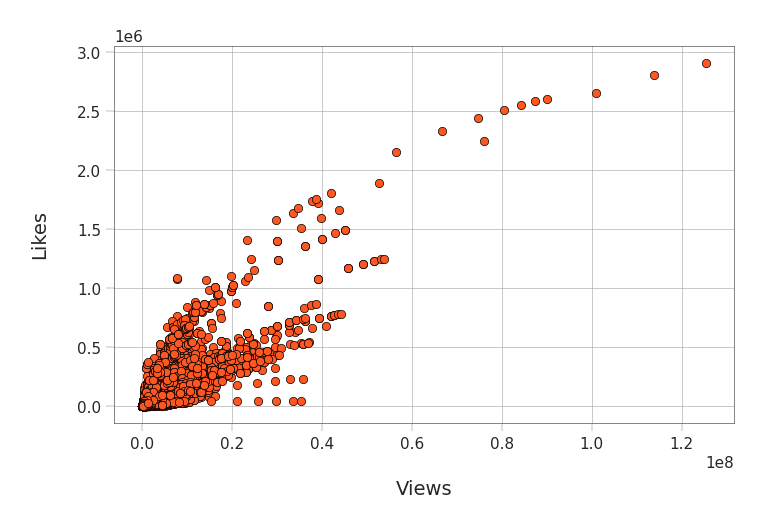

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [ ]:
import datetime

df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

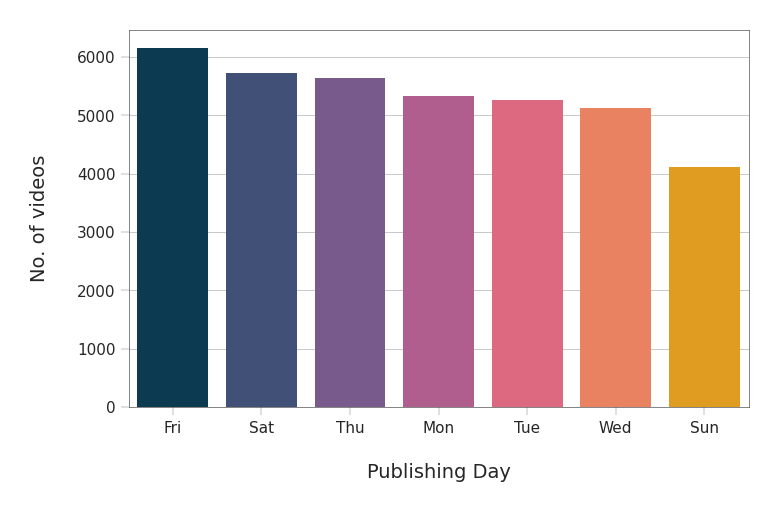

In [ ]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

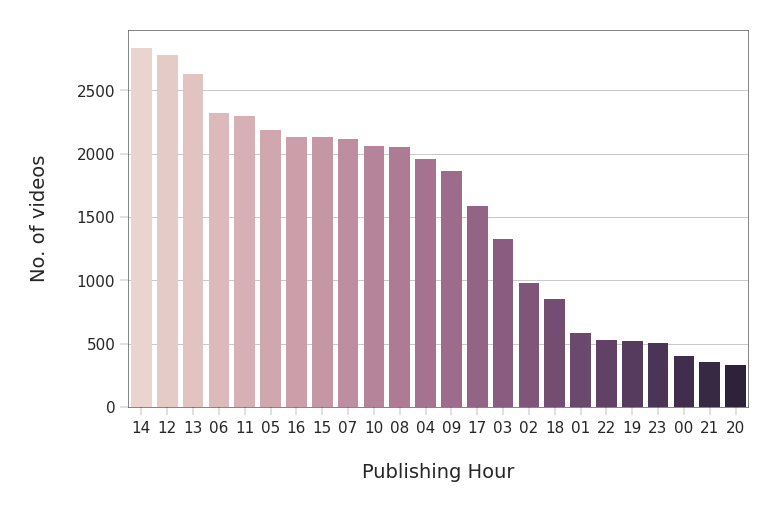

In [ ]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

Wordcloud by tags 

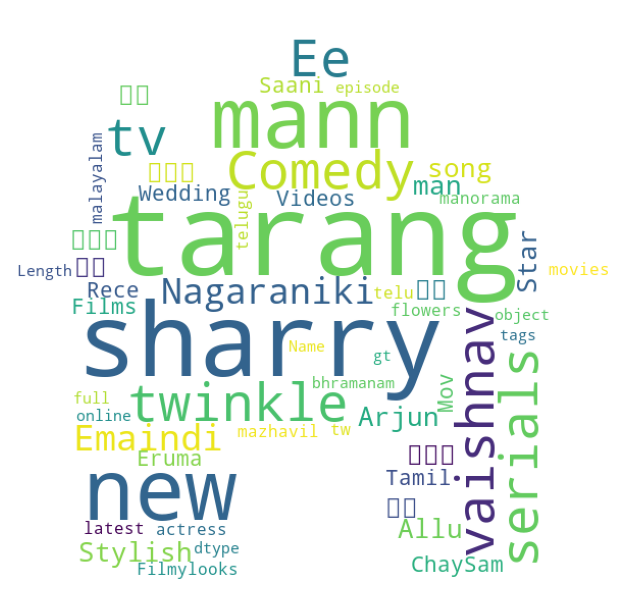

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt


mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(df["tags"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

In [ ]:
#Wordcloud by names(in title)

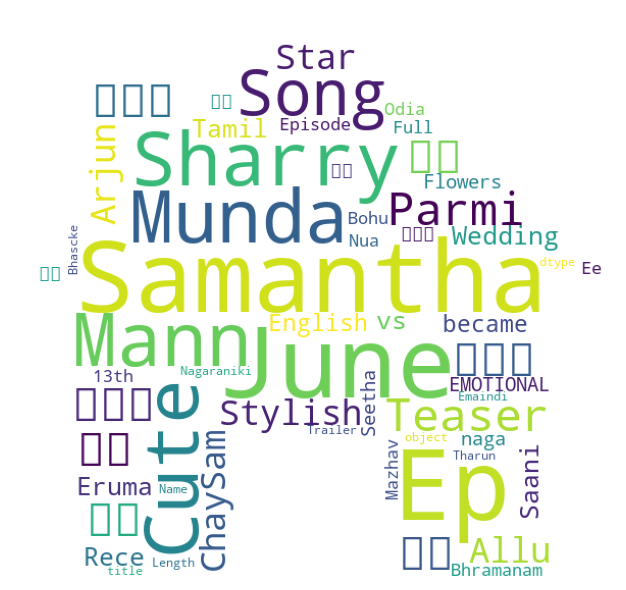

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt


mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(df["title"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

# Trending videos by Category



In [ ]:
cdf = df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": "No_of_videos"}, inplace=True)
print(cdf)

                category  No_of_videos
0          Entertainment         16712
1        News & Politics          5241
2                  Music          3858
3                 Comedy          3429
4         People & Blogs          2624
5       Film & Animation          1658
6              Education          1227
7          Howto & Style           845
8                 Sports           731
9   Science & Technology           552
10                 Shows           205
11      Autos & Vehicles            72
12                Gaming            66
13                Movies            16
14       Travel & Events             8
15        Pets & Animals             3


# Trending videos by Category



(In form of graph)

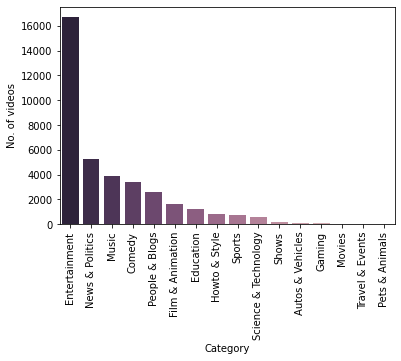

In [ ]:
cdf = df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

# Top 10 trending videos on basis of views, likes, dislikes, comment_count.


In [ ]:
df.sort_values('views', ascending=False).head(10).set_index('title')[['views']]

,views
title,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,125432237
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,113876217
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,100911567
Marvel Studios' Avengers: Infinity War Official Trailer,89930713
Marvel Studios' Avengers: Infinity War Official Trailer,87449453
Marvel Studios' Avengers: Infinity War Official Trailer,84281319
Marvel Studios' Avengers: Infinity War Official Trailer,80360459
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,75969469
Marvel Studios' Avengers: Infinity War Official Trailer,74789251


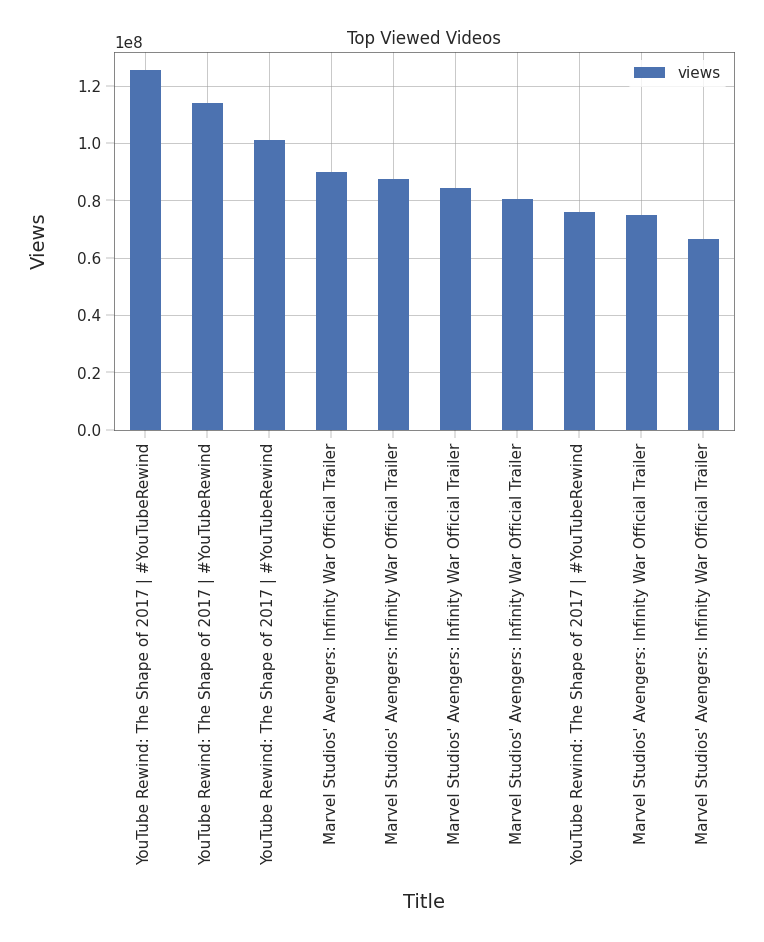

In [ ]:
df.sort_values('views', ascending=False).head(10).set_index('title')[['views']].plot(kind = 'bar')
plt.title("Top Viewed Videos")
plt.xlabel("Title")
plt.ylabel("Views")
plt.show()

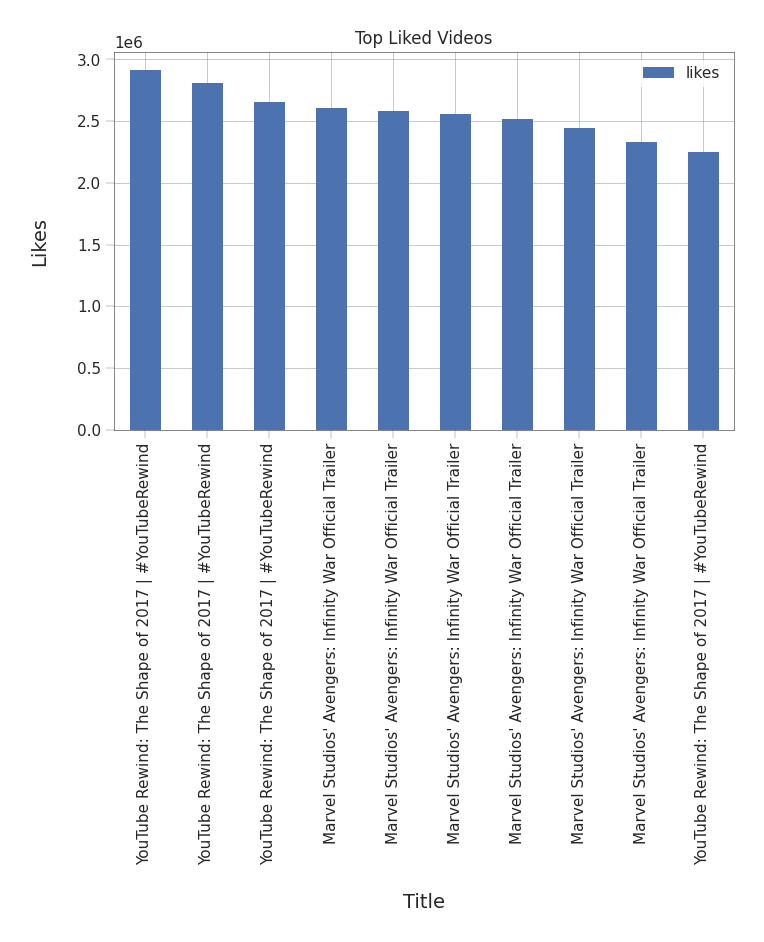

In [ ]:
df.sort_values('likes', ascending=False).head(10).set_index('title')[['likes']].plot(kind = 'bar')
plt.title("Top Liked Videos")
plt.xlabel("Title")
plt.ylabel("Likes")
plt.show()

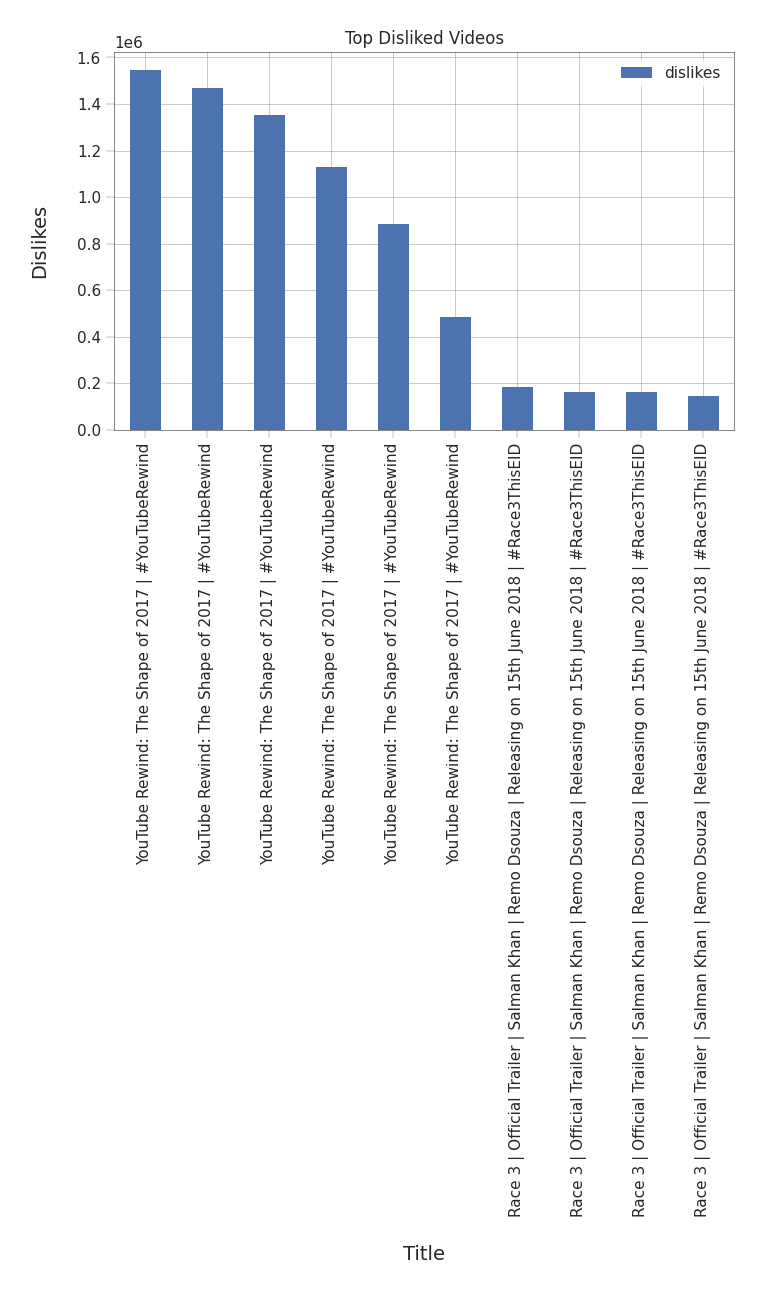

In [ ]:
df.sort_values('dislikes', ascending=False).head(10).set_index('title')[['dislikes']].plot(kind = 'bar')
plt.title("Top Disliked Videos")
plt.xlabel("Title")
plt.ylabel("Dislikes")
plt.show()

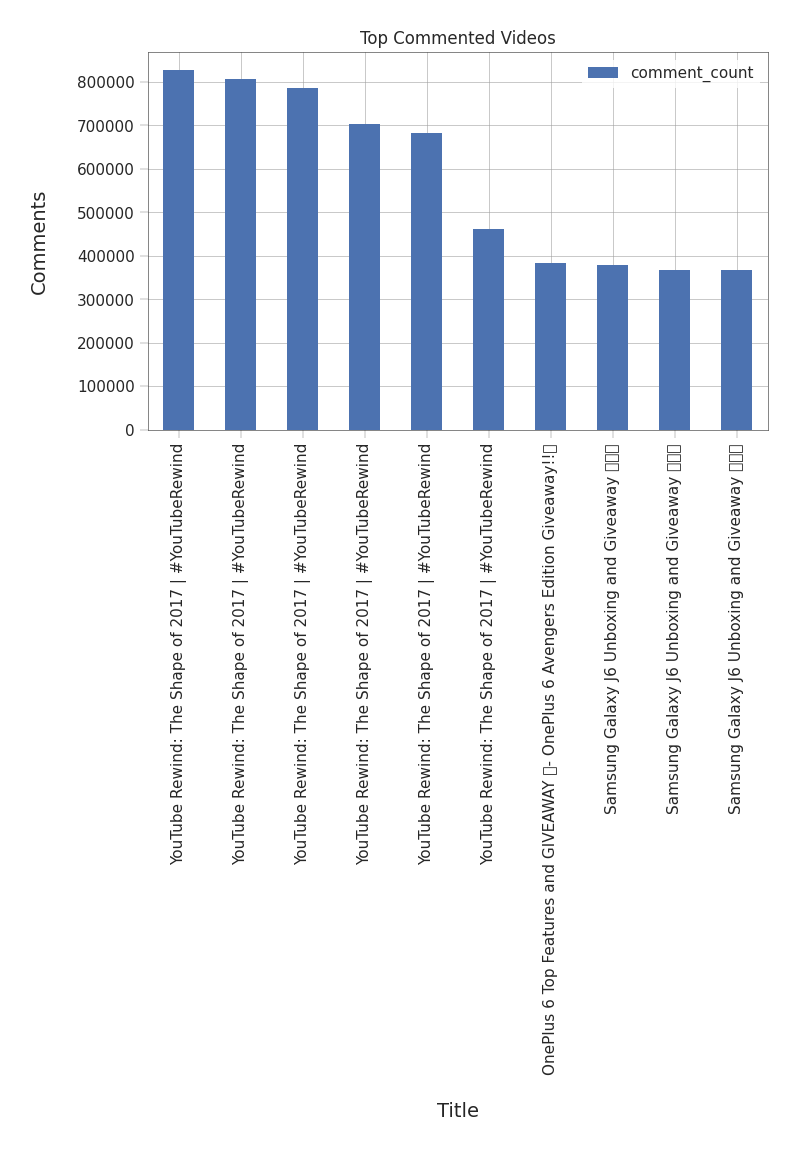

In [ ]:
df.sort_values('comment_count', ascending=False).head(10).set_index('title')[['comment_count']].plot(kind = 'bar')
plt.title("Top Commented Videos")
plt.xlabel("Title")
plt.ylabel("Comments")
plt.show()

# Top Trending  Youtube Channels in India. 

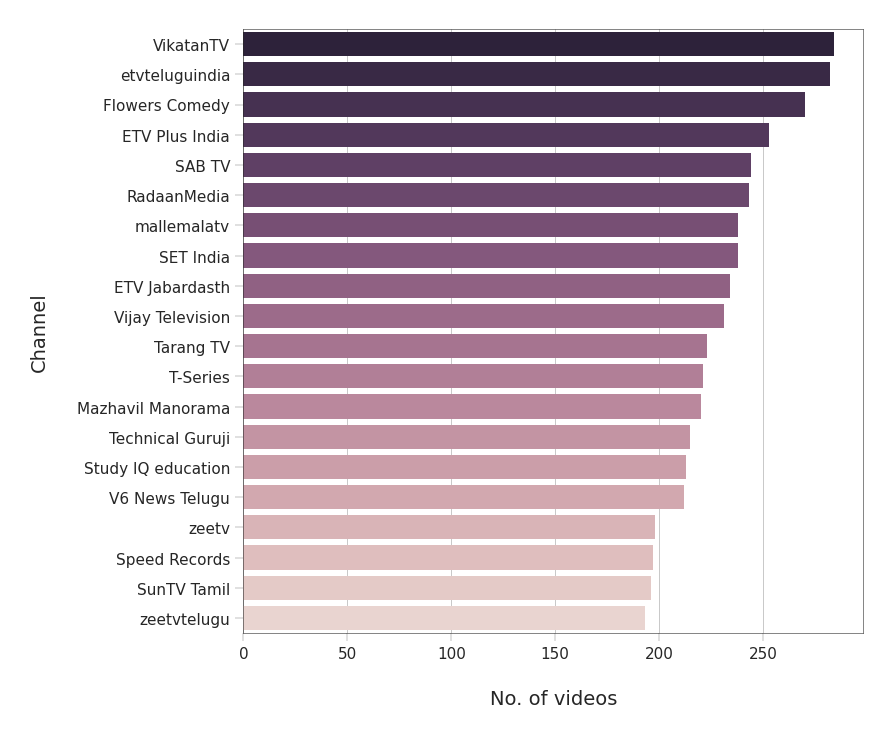

In [ ]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

# 10 Trending channels with trending videos. 

In [ ]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(10)
print(cdf)    



         channel_title  video_count
1275         VikatanTV          284
1378    etvteluguindia          282
353     Flowers Comedy          270
298     ETV Plus India          253
915             SAB TV          244
860        RadaanMedia          243
1394       mallemalatv          238
920          SET India          238
296     ETV Jabardasth          234
1273  Vijay Television          231
